Filtro FIR Passa Baixa (Media Movel - 2 vetores - amostras x coeficientes)

vetor de amostras (len(k))

x[n]
x[n-1]
x[n-2]
x[n-3]


vetor de coef (len(k))
1
-- => k1
k

1
-- => k2
k

1
-- => k3
k

1
-- = k4
k


- Ler cada amostra x[n] e acumular no vetor

- Calcula y[n] - 1\k * x[n]

- Desloca o vetor - 1a. posicao - valor atual - os outros deslocam

- Usar na entrada um Impulso - vetor onde [n] = 1, restante = 0
    - y[n] =    n   = 0 - 1 = 1\k
      k = 4     n-1 = 1 - 0 = 1\k
                n-2 = 2 - 0 = 1\k
                n-3 = 3 - 0 = 1\k
                n-4 = 4 - 0 = 0
                ..
                n-5 = 5 - 0 = 0

- Usar na entrada um degrau - vetor onde todos = 1
    - y[n] =    n   = 0 - 1 = 1\k
      k = 4     n-1 = 1 - 1 = 2\k
                n-2 = 2 - 1 = 3\k
                n-3 = 3 - 1 = 4\k
                n-4 = 4 - 1 = 5\k
                n-5 = 5 - 1 = 6\k
                ..

- Usar na entrada um Sweep (Ocen)

- Testar com diferentes tamanhos de media e salvar o arquivo de saida, por exemplo, k = 4, 8, 16, 32, ...


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Definindo o tamanho da Média
M = 16

# Alocar os vetores
x = np.zeros((M, 1))
coef = np.zeros((M, 1))

In [11]:
# Inicializar os vetores
for j in range(M):
    coef[j, 0] = 1/M
    x[j, 0] = 0

In [12]:
# Lendo o arquivo de entrada
with open('/workspaces/UNIVALI/21814_PDS/Aula_01/Sinais_Ocen/Sweep40_3400Hz.pcm', 'rb') as fid:
    s = np.fromfile(fid, dtype=np.int16)
    

Text(0.5, 1.0, 'Entrada do Filtro')

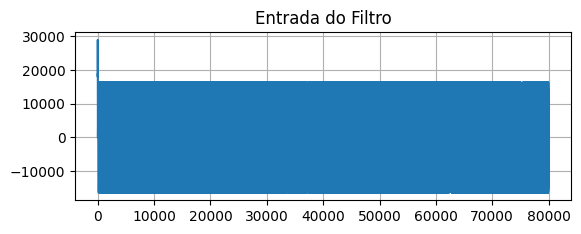

In [13]:
plt.subplot(2, 1, 1)
plt.plot(s)
plt.grid()
plt.title('Entrada do Filtro')

In [14]:
itera = len(s)

# Salvar parcelas intermediárias
sav_y = np.zeros(itera)

In [15]:
# Executa o processamento
for j in range(itera):
    x[0, 0] = s[j]
    # Realizar a Soma de Produto (SOP) - Convolução
    y = np.sum(coef * x)
    sav_y[j] = y
    # Deslocar o vetor de amostra
    for n in range(M-1, 0, -1):
        x[n, 0] = x[n-1, 0]

Text(0.5, 1.0, 'Saída do Filtro')

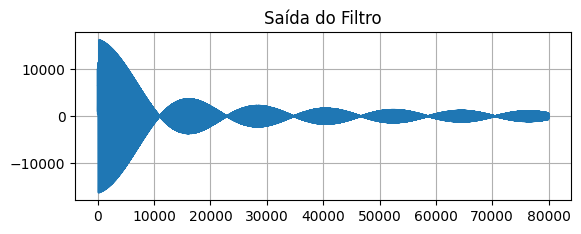

In [16]:
# Plotar a saída
plt.subplot(2, 1, 2)
plt.plot(sav_y)
plt.grid()
plt.title('Saída do Filtro')

In [11]:
# Salvar arquivo de saída
with open('saida_mm_sw.pcm', 'wb') as fid2:
    sav_y.astype(np.int16).tofile(fid2)